<a href="https://colab.research.google.com/github/thangpro1242002/-o_An-1/blob/main/Ph%C3%A2n_t%C3%ADch_d%E1%BB%AF_li%E1%BB%87u_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as sm
from wordcloud import WordCloud,STOPWORDS
stopwords = list(STOPWORDS)

## Hotel infor

In [ ]:

#doc file
df = pd.read_csv("LamDong_Infor.csv")

In [ ]:
df.sample(10)

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
692,NaN,0.0,0.0,NaN,NaN,Pho Hoa Hotel,NaN,Vietnam,"Vietnam,,",NaN,...,0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
711,"87 Bui Thi Xuan, 670000 Vietnam",4.0,86.0,NaN,NaN,Lavender Fullhouse,NaN,Vietnam,"Vietnam,,",Which popular attractions are close to Lavende...,...,0,NaN,0.0,NaN,63.0,NaN,9,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
1556,"20 Xo Viet Nghe Tinh, Vietnam",2.0,36.0,NaN,NaN,An An Diamond Hotel,$24,$12,"$12, - ,$24",Which popular attractions are close to An An D...,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
1896,"26C Yersin, Ward 10, 670000 Vietnam",3.0,72.0,NaN,"English, Vietnamese",Dang Uyen 2 Hotel,$15,$12,"$12, - ,$15",Which popular attractions are close to Dang Uy...,...,4,#106 of 799 B&Bs / Inns in,45.0,NaN,22.0,Excellent,10,"Family,Budget",NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
2982,"17 Thu Khoa Huan, Ward 1, 61000 Vietnam",1.0,50.0,NaN,NaN,Phuong Mai Hotel,Lam Dong,Vietnam,"Vietnam,,Lam Dong",Which popular attractions are close to Phuong ...,...,NaN,NaN,NaN,20,19.0,NaN,40,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2980...
1448,"S_ 25/3, H_m 10 Xo Vi_t Ngh_ Tinh, Vietnam",0.0,0.0,NaN,NaN,The May - Stay & More,NaN,Vietnam,"Vietnam,,",Which popular attractions are close to The May...,...,0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
773,"So 5B Le Hong Phong, Vietnam",5.0,80.0,NaN,NaN,Dong Y Homestay,NaN,Vietnam,"Vietnam,,",Which popular attractions are close to Dong Y ...,...,0,NaN,0.0,NaN,32.0,NaN,NaN,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
862,"Lot B3/13, 9 Dinh Tien Hoang Cultural And Urba...",3.0,74.0,NaN,NaN,Lien Huong 2 Hotel,NaN,Vietnam,"Vietnam,,",Which popular attractions are close to Lien Hu...,...,0,NaN,0.0,2.0 of 5 bubbles,25.0,NaN,37,NaN,0.0,https://www.tripadvisor.com/Hotel_Review-g2939...
31,NaN,NaN,NaN,NaN,NaN,RoÌt Homestay,Lam Dong,NaN,"Vietnam,,Lam Dong",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lam Dong,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2980...
2202,"36/4 Thong Thien Hoc, Ward 2, Vietnam",20.0,72.0,NaN,NaN,Dong Duc Hostel,$16,$11,"$11, - ,$16",Which popular attractions are close to Dong Du...,...,1 review,"#264 of 1,320 Specialty lodging in",5.0,NaN,173.0,Excellent,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...


In [ ]:
df.columns.values

array(['HAddress', 'HAttractions', 'HGFW', 'HImages', 'HLanguage',
       'HName', 'HPMax', 'HPMin', 'HPRange', 'HQuestions', 'HRImages',
       'HRNumber', 'HRank', 'HRankreview', 'HRating', 'HRestaurants',
       'HReview', 'HRoom', 'HStyles', 'HVideos', 'URL'], dtype=object)

In [ ]:
# Phân loại biến định tính:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('Có {} biến định tính.'.format(len(categorical)))
print('Các biến định tính là :', categorical)
print('_'*20)

# Phân loại biến định lượng:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('Có {} biến định lượng.'.format(len(numerical)))
print('Các biến định lượng là :', numerical)

Có 14 biến định tính.
Các biến định tính là : ['HAddress', 'HLanguage', 'HName', 'HPMax', 'HPMin', 'HPRange', 'HQuestions', 'HRNumber', 'HRank', 'HRating', 'HReview', 'HRoom', 'HStyles', 'URL']
____________________
Có 7 biến định lượng.
Các biến định lượng là : ['HAttractions', 'HGFW', 'HImages', 'HRImages', 'HRankreview', 'HRestaurants', 'HVideos']


In [ ]:
#Tính phần trăm cho từng giá trị trong cột dữ liệu và vẽ biểu đồ trực quan barplot
def stat_table(a, size = (10,15)):
    x = df.groupby(a)[a].count()
    dt = pd.DataFrame(x)
    dt.columns = ['Percent']
    percent = []
    for i in dt['Percent']:
        x = (i/len(df[a]))*100
        percent.append(x)
    dt['Percent'] = percent
    print(dt)
    mylabels = dt.index
    fig = plt.figure(figsize = (5, 10))
    # barplot
    sns.barplot(percent, mylabels, data = dt, orient = 'h')

             Percent
HReview             
Average     4.470743
Excellent  15.713346
Poor        1.380671
Terrible    2.005260
Very good   9.040105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


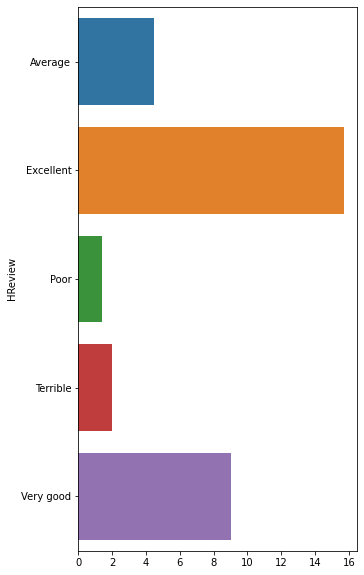

In [ ]:
stat_table("HReview")

Ta thấy được rằng số lượng khách sạn được đánh giá là Excellent và Very good là rất cao, chiếm số phần trăm lớn hơn gấp nhiều lần so với Average, Poor và Terrible.

=> Chứng tỏ độ thỏa mãn của khách hàng đối với đa số khách sạn ở Lâm Đồng là rất cao

=> Khách sạn ở Lâm Đồng phù hợp để được chọn là nơi nghỉ ngơi khi đi du lịch, công tác tại Lâm Đồng.

##Review Anh

In [ ]:
#doc file
data = pd.read_csv("LamDong1.csv")

In [ ]:
data.sample(4)

,HComment,HCommenter,HContribute,HDate,HThanks,HTime,HTravelType,HTravelerRating,h_Hotel_name,h_reviewer_address,h_reviewer_id,h_title_comment,h_url
32,From the moment we arrived we were greeted wit...,Li F,32.0,Date of stay: December 2015,3.0,15-Dec,Traveled with family,5.0,Ivory Falls Villa,"Eastleigh, United Kingdom",https://www.tripadvisor.com/Profile/304lif,"Peaceful getaway, excellent service",https://www.tripadvisor.com/Hotel_Review-g2155...
3980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
1641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...
2135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.tripadvisor.com/Hotel_Review-g2939...


In [ ]:
# Kiem tra cac gia tri null
data.isnull().sum()

HComment              2840
HCommenter            2838
HContribute           2884
HDate                 2849
HThanks               4124
HTime                 2839
HTravelType           5648
HTravelerRating       2839
h_Hotel_name          2822
h_reviewer_address    5339
h_reviewer_id         2884
h_title_comment       2840
h_url                    0
dtype: int64

In [ ]:
#Làm sạch dữ liệu
import re

def  clean_text(text):
    """
    Lam sach cac du lieu van ban
    * ky hieu
    * doi thanh lower case
    """
    text = text.str.lower()
    text = text.apply(lambda T: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(T))  )
        
    return text

In [ ]:
data.columns.values

array(['HComment', 'HCommenter', 'HContribute', 'HDate', 'HThanks',
       'HTime', 'HTravelType', 'HTravelerRating', 'h_Hotel_name',
       'h_reviewer_address', 'h_reviewer_id', 'h_title_comment', 'h_url'],
      dtype=object)

In [ ]:
data['HComment']= clean_text(data['HComment'])

In [ ]:
data[["HComment", 'HTravelerRating']].sample(10)

,HComment,HTravelerRating
485,this is an outstanding hotel to stay in judged...,5.0
2164,nan,NaN
2018,nan,NaN
4271,we have been travelling se asia for 2 months a...,1.0
4664,nan,NaN
9397,we stayed 3 nights during the new year period ...,5.0
2590,nan,NaN
3238,incredibly nice place and family to visit very...,5.0
1901,nan,NaN
4249,nan,NaN


In [ ]:
data.HTravelerRating.value_counts()

5.0    5123
4.0    1705
3.0     889
1.0     432
2.0     387
Name: HTravelerRating, dtype: int64

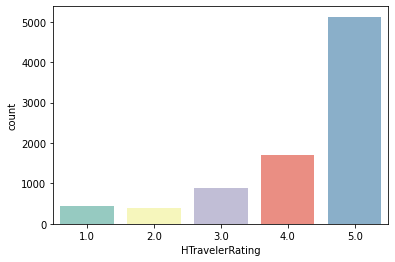

In [ ]:
sns.countplot(data=data,x='HTravelerRating', palette="Set3")

Nhận xét: Số lượng rating 5 sao cho các khách sạn ở Lâm Đồng cao gấp nhiều lần tổng rating 1 đến 4 sao.

=> Điều này có nghĩa rằng các khách sạn ở Lâm Đồng rất tốt và phù hợp với nhu cầu của khách hàng.

Ta có thể thấy rõ rằng biến mục tiêu (Rating) không cân bằng, vì có sự khác biệt rất lớn trong rating từ 1 và 5. Vì vậy, ở đây ta sẽ sử dụng một số kỹ thuật lấy mẫu để cân bằng các lớp này.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


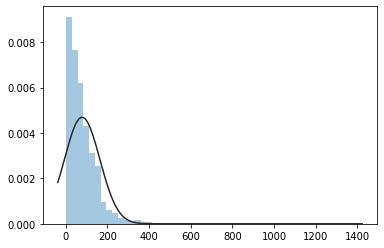

In [ ]:
## Lấy số lượng từ bằng cách tách chúng theo dấu cách
words_per_review = [len(x.split(" ")) for x in data['HComment']]
sns.distplot(words_per_review,fit=norm, kde=False)

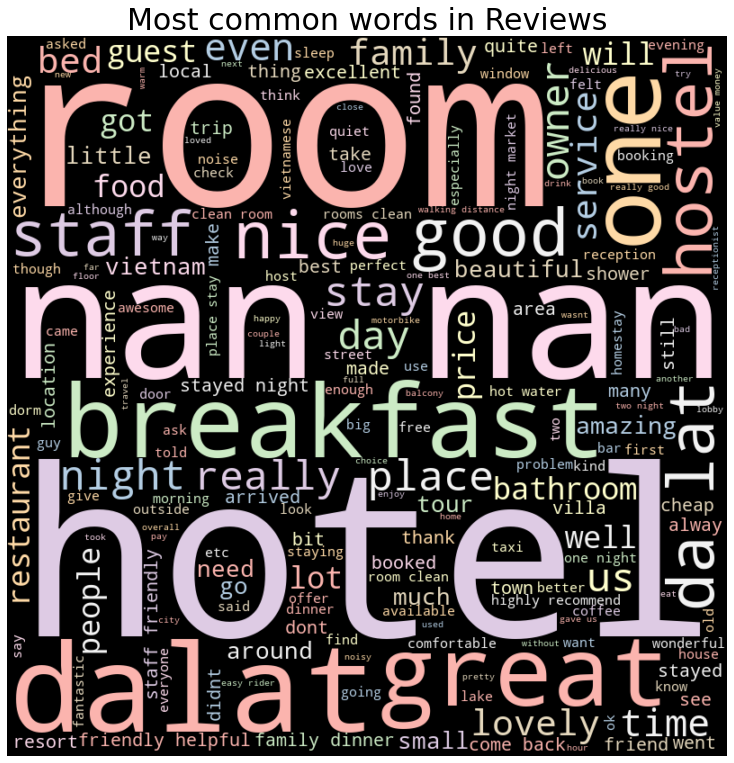

In [ ]:
def wordCloud_generator(data):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10,
                          colormap='Pastel1'
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Most common words in Reviews",fontsize=30)
    plt.show() 
    
wordCloud_generator(data['HComment'])

##Dùng Linear Regression để dự đoán số lượng nhà hàng gần  khách sạn

In [ ]:
# Drop dữ liệu thiếu và reset index
df_1 = df.copy()
df_2 = df_1.dropna()
df_2 = df_2.reset_index(drop = True)
df_2.head()

,HAddress,HAttractions,HGFW,HImages,HLanguage,HName,HPMax,HPMin,HPRange,HQuestions,...,HRNumber,HRank,HRankreview,HRating,HRestaurants,HReview,HRoom,HStyles,HVideos,URL
0,"03 Huynh Thuc Khang St Ward 4, Vietnam",4.0,80.0,890.0,"English, Vietnamese",Crazy House,$55,$39,"$39, - ,$55",Which popular attractions are close to Crazy H...,...,353,#2 of 77 guest houses in,4.0,1.0 of 5 bubbles,41.0,Very good,10,Quaint,15.0,https://www.tripadvisor.com/Hotel_Review-g2939...
1,"Zone 7&8, Tuyen Lam Lake Tourist Area, Ward 3,...",0.0,0.0,713.0,Vietnamese,Swiss-Belresort Tuyen Lam Dalat,$83,$48,"$48, - ,$83",Which popular attractions are close to Swiss-B...,...,391,#3 of 6 resorts in,4.5,5.0 of 5 bubbles,0.0,Excellent,151,"Family Resort,Great View",81.0,https://www.tripadvisor.com/Hotel_Review-g2939...
2,"42 Nguyen Chi Thanh Street, 670000 Vietnam",19.0,91.0,355.0,Vietnamese,TTC Hotel - Ngoc Lan,$66,$44,"$44, - ,$66",Which popular attractions are close to TTC Hot...,...,483,#8 of 153 hotels in,4.0,4.0 of 5 bubbles,107.0,Very good,91,"Centrally Located,Mid-range",4.0,https://www.tripadvisor.com/Hotel_Review-g2939...
3,"15 Tran Phu Street, Ward 3, 8463 Vietnam",39.0,79.0,397.0,"English, Vietnamese",Du Parc Hotel Dalat,$46,$33,"$33, - ,$46",Which popular attractions are close to Du Parc...,...,650,#11 of 153 hotels in,3.5,4.0 of 5 bubbles,282.0,Very good,140,"Classic,Historic Hotel",39.0,https://www.tripadvisor.com/Hotel_Review-g2939...
4,"Le Lai Street, Ward 5, 61000 Vietnam",16.0,54.0,933.0,"English, Vietnamese",Ana Mandara Villas Dalat Resort & Spa,$135,$62,"$62, - ,$135",Which popular attractions are close to Ana Man...,...,820,#2 of 6 resorts in,4.5,5.0 of 5 bubbles,100.0,Excellent,87,"Romantic,Charming",2.0,https://www.tripadvisor.com/Hotel_Review-g2939...


In [ ]:
df_2.index.names = ['STT']

In [ ]:
x = []
for i in range(0, len(df_2)):
    a = i + 1
    x.append(a)
df_2.insert(0, 'Number', pd.Series(x), allow_duplicates=False)

In [ ]:
df_2.describe()

,Number,HAttractions,HGFW,HImages,HRImages,HRankreview,HRestaurants,HVideos
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,14.018182,76.254545,110.836364,32.690909,14.154545,86.745455,8.836364
std,16.02082,14.346881,18.266766,199.215291,45.671886,16.714618,80.097676,13.413321
min,1.00000,0.000000,0.000000,2.000000,1.000000,3.000000,0.000000,1.000000
25%,14.50000,4.000000,72.500000,19.500000,9.000000,4.000000,30.500000,2.000000
50%,28.00000,9.000000,83.000000,29.000000,16.000000,4.500000,76.000000,4.000000
75%,41.50000,20.500000,89.000000,103.500000,32.500000,35.000000,116.500000,8.500000
max,55.00000,90.000000,91.000000,933.000000,248.000000,50.000000,511.000000,81.000000


Text(0, 0.5, 'Số lượng nhà hàng gần khách sạn')

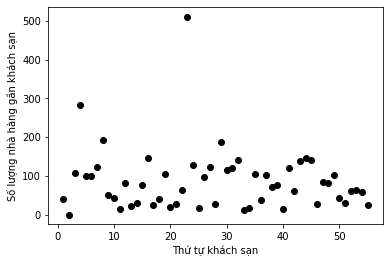

In [ ]:
# Vẽ biểu đồ để thấy số lượng nhà hàng gần khách sạn có thể tới
x = df_2['Number']
y = df_2['HRestaurants']
plt.plot(x,y,'go', color='black')
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Số lượng nhà hàng gần khách sạn')

In [ ]:
# Các biến của tập train
names = ['HAttractions', 'HImages', 'HRImages', 'HRankreview', 'HRestaurants', 'HVideos']
X_train = df_2[names]
X_train

,HAttractions,HImages,HRImages,HRankreview,HRestaurants,HVideos
STT,,,,,,
0,4.0,890.0,186.0,4.0,41.0,15.0
1,0.0,713.0,108.0,4.5,0.0,81.0
2,19.0,355.0,23.0,4.0,107.0,4.0
3,39.0,397.0,41.0,3.5,282.0,39.0
4,16.0,933.0,248.0,4.5,100.0,2.0
5,20.0,154.0,28.0,4.5,99.0,22.0
6,18.0,14.0,4.0,35.0,122.0,4.0
7,29.0,7.0,3.0,50.0,193.0,1.0
8,3.0,2.0,10.0,40.0,50.0,2.0


In [ ]:
y_train= df_2['HRestaurants']
y_train

STT
0      41.0
1       0.0
2     107.0
3     282.0
4     100.0
5      99.0
6     122.0
7     193.0
8      50.0
9      43.0
10     14.0
11     81.0
12     23.0
13     30.0
14     76.0
15    145.0
16     25.0
17     39.0
18    104.0
19     20.0
20     27.0
21     64.0
22    511.0
23    128.0
24     18.0
25     96.0
26    123.0
27     27.0
28    188.0
29    114.0
30    121.0
31    142.0
32     11.0
33     18.0
34    104.0
35     37.0
36    102.0
37     72.0
38     77.0
39     15.0
40    119.0
41     61.0
42    138.0
43    145.0
44    142.0
45     27.0
46     85.0
47     82.0
48    103.0
49     43.0
50     31.0
51     61.0
52     63.0
53     57.0
54     25.0
Name: HRestaurants, dtype: float64

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# y = ax + b  
# a: regression coefficient
# b: intercept
# x: independent variable (input)
# y: dependent variable (outcome)

In [ ]:
regressor.coef_

array([-1.48424320e-15,  0.00000000e+00, -6.93889390e-17,  0.00000000e+00,
        1.00000000e+00, -5.22151766e-16])

In [ ]:
regressor.intercept_

-1.4210854715202004e-14

In [ ]:
y_predict = regressor.predict(X_train)

Text(0.5, 1.0, 'Linear Regression')

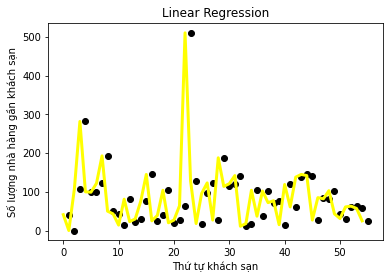

In [ ]:
# Vàng là giá trị dự đoán
# Đen là giá trị thực tế
plt.scatter(x,y,  color='black')
plt.plot(y_predict, color='yellow', linewidth=3)
plt.xlabel('Thứ tự khách sạn')
plt.ylabel('Số lượng nhà hàng gần khách sạn')
plt.title('Linear Regression')

In [ ]:
mse = mean_squared_error(y_train, y_predict)  # (y_predict - y_train)**2
mse  # trung bình bình phương các lỗi, số càng lớn thì lỗi càng lớn (với lỗi là sự khác nhau giữa thực tế và dự đoán)

5.181261296456834e-28

In [ ]:
r2_score(y_train, y_predict) # cần gần 1 thì 2 tập dữ liệu càng giống nhau

1.0

## Kết luận:Dễ thấy rằng  thấy có thể dùng mô hình Linear để dự đoán số lượng nhà hàng gần khách sạn. Mô hình cho thấy có thể dùng Linear để dự đoán số lượng nhà hàng gần khách sạn. Có thể lọc các dữ liệu nhiễu để độ tính toán của mô hình chính xác hơn.